<a href="https://colab.research.google.com/github/Almehrab/Computer-Vision-Project/blob/Training-and-testing-our-results/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png">
  </a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/models/ultralytics/yolo11"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
</div>

This **Ultralytics YOLOv5 Colab Notebook** is the easiest way to get started with [YOLO models](https://www.ultralytics.com/yolo)—no installation needed. Built by [Ultralytics](https://www.ultralytics.com/), the creators of YOLO, this notebook walks you through running **state-of-the-art** models directly in your browser.

Ultralytics models are constantly updated for performance and flexibility. They're **fast**, **accurate**, and **easy to use**, and they excel at [object detection](https://docs.ultralytics.com/tasks/detect/), [tracking](https://docs.ultralytics.com/modes/track/), [instance segmentation](https://docs.ultralytics.com/tasks/segment/), [image classification](https://docs.ultralytics.com/tasks/classify/), and [pose estimation](https://docs.ultralytics.com/tasks/pose/).

Find detailed documentation in the [Ultralytics Docs](https://docs.ultralytics.com/). Get support via [GitHub Issues](https://github.com/ultralytics/ultralytics/issues/new/choose). Join discussions on [Discord](https://discord.com/invite/ultralytics), [Reddit](https://www.reddit.com/r/ultralytics/), and the [Ultralytics Community Forums](https://community.ultralytics.com/)!

Request an Enterprise License for commercial use at [Ultralytics Licensing](https://www.ultralytics.com/license).

<br>
<div>
  <a href="https://www.youtube.com/watch?v=ZN3nRZT7b24" target="_blank">
    <img src="https://img.youtube.com/vi/ZN3nRZT7b24/maxresdefault.jpg" alt="Ultralytics Video" width="640" style="border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
  </a>

  <p style="font-size: 16px; font-family: Arial, sans-serif; color: #555;">
    <strong>Watch: </strong> How to Train
    <a href="https://github.com/ultralytics/ultralytics">Ultralytics</a>
    <a href="https://docs.ultralytics.com/models/yolo11/">YOLO11</a> Model on Custom Dataset using Google Colab Notebook 🚀
  </p>
</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content
!git clone -q https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -q -r requirements.txt
!pip install -q deepface==0.0.93 opencv-python-headless==4.10.0.84 scikit-learn==1.5.2 matplotlib==3.9.2 pandas==2.2.3


/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
YOLO_DATA_ROOT = "/content/drive/MyDrive/yolo_dataset"
KNOWN_FACES_ROOT = "/content/drive/MyDrive/Own Dataset/known_faces"  # Tawsif/, Nina/
DATA_YAML_PATH = "/content/yolo_data.yaml"
HYP_YAML_PATH = "/content/hyp_fast15.yaml"


In [ ]:
data_yaml = f"""
train: {YOLO_DATA_ROOT}/images/train
val: {YOLO_DATA_ROOT}/images/val

nc: 1
names: ["face"]
"""
with open(DATA_YAML_PATH, "w") as f:
    f.write(data_yaml)


In [ ]:
hyp_yaml = """
lr0: 0.01
lrf: 0.2
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 1.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1

hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 3.0
translate: 0.05
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 0.8
mixup: 0.1
copy_paste: 0.0

box: 0.05
cls: 0.3
obj: 0.6
cls_pw: 1.0
obj_pw: 1.0
fl_gamma: 0.0

anchor_t: 4.0
"""
with open("/content/hyp_fast15.yaml","w") as f:
    f.write(hyp_yaml)


In [ ]:
!cat /content/hyp_fast15.yaml



lr0: 0.01
lrf: 0.2
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 1.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1

hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 3.0
translate: 0.05
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 0.8
mixup: 0.1
copy_paste: 0.0

box: 0.05
cls: 0.3
obj: 0.6
cls_pw: 1.0
obj_pw: 1.0
fl_gamma: 0.0

anchor_t: 4.0


In [ ]:
!python train.py --img 640 --batch 16 --epochs 15 --data /content/yolo_data.yaml --weights yolov5s.pt --hyp /content/hyp_fast15.yaml --project /content/yolo_runs --name face_det --exist-ok


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-31 00:28:02.744249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761870482.765485    9638 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761870482.771881    9638 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761870482.788258    9638 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761870482.788284    9638 computation_placer.cc:177] computation placer already registere

In [ ]:
import glob, os
TRAIN_DIR = sorted(glob.glob("/content/yolo_runs/face_det*"))[-1]
BEST_WEIGHTS = os.path.join(TRAIN_DIR, "weights", "best.pt")
RESULTS_CSV = os.path.join(TRAIN_DIR, "results.csv")


In [ ]:
!python val.py --weights {BEST_WEIGHTS} --data {DATA_YAML_PATH} --img 640 --project /content/yolo_runs --name face_val --exist-ok

VAL_DIR = "/content/yolo_runs/face_val"


val: data=/content/yolo_data.yaml, weights=['/content/yolo_runs/face_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/yolo_runs, name=face_val, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolo_dataset/labels/val.cache... 619 images, 81 backgrounds, 0 corrupt: 100% 700/700 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 22/22 [00:28<00:00,  1.31s/it]
                   all        700        620      0.944      0.982      0.978      0.803
Speed: 0.2ms pre-process, 5.1ms inference, 2.8ms NMS per image at shape (32

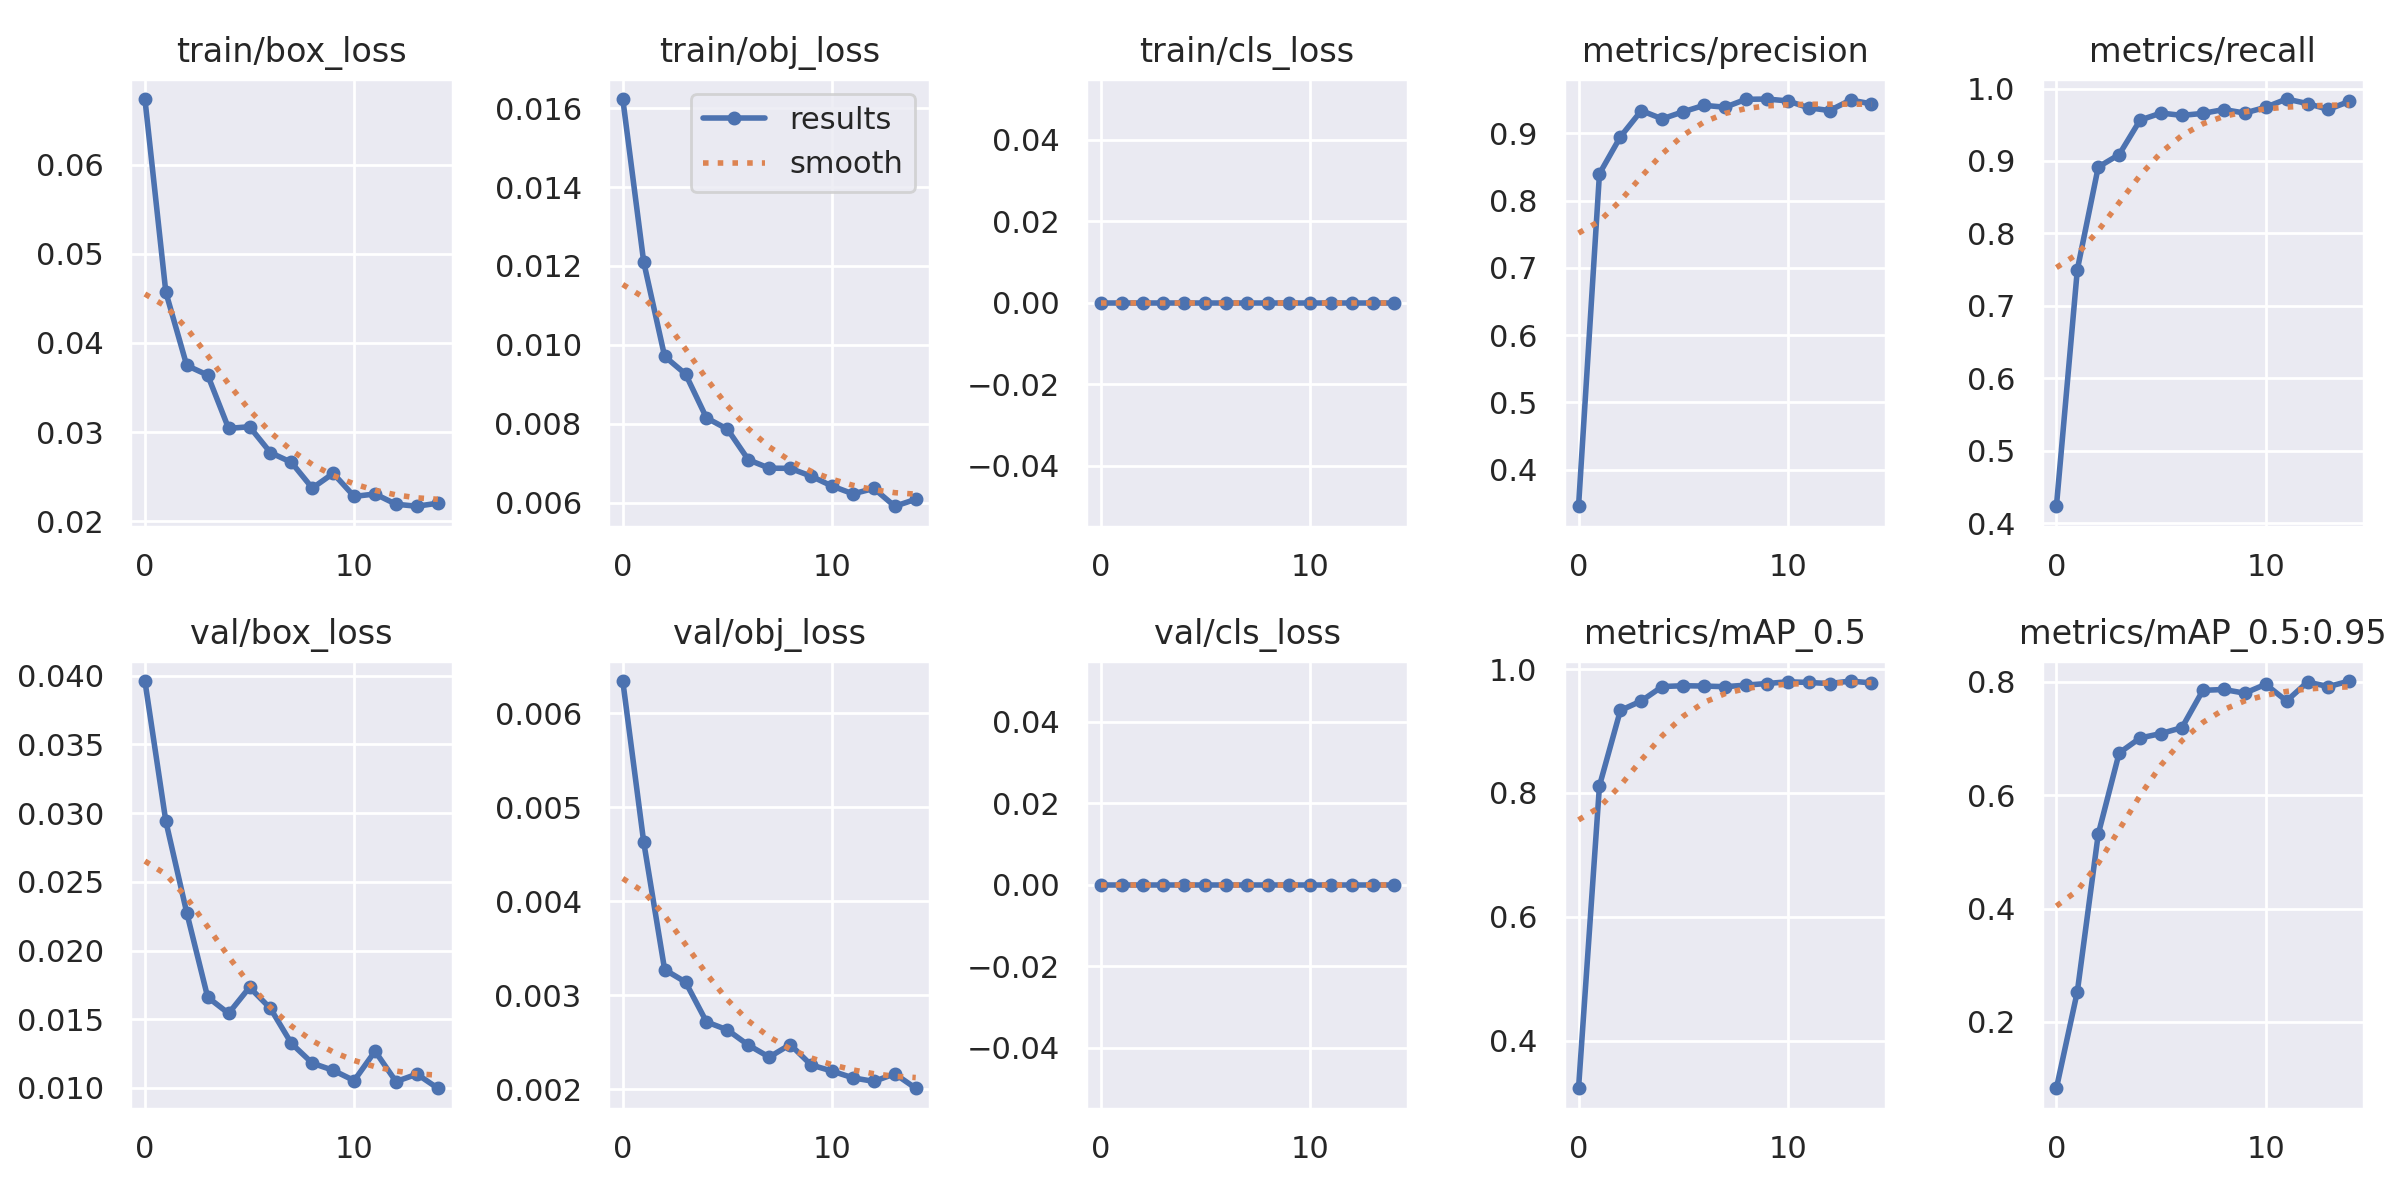

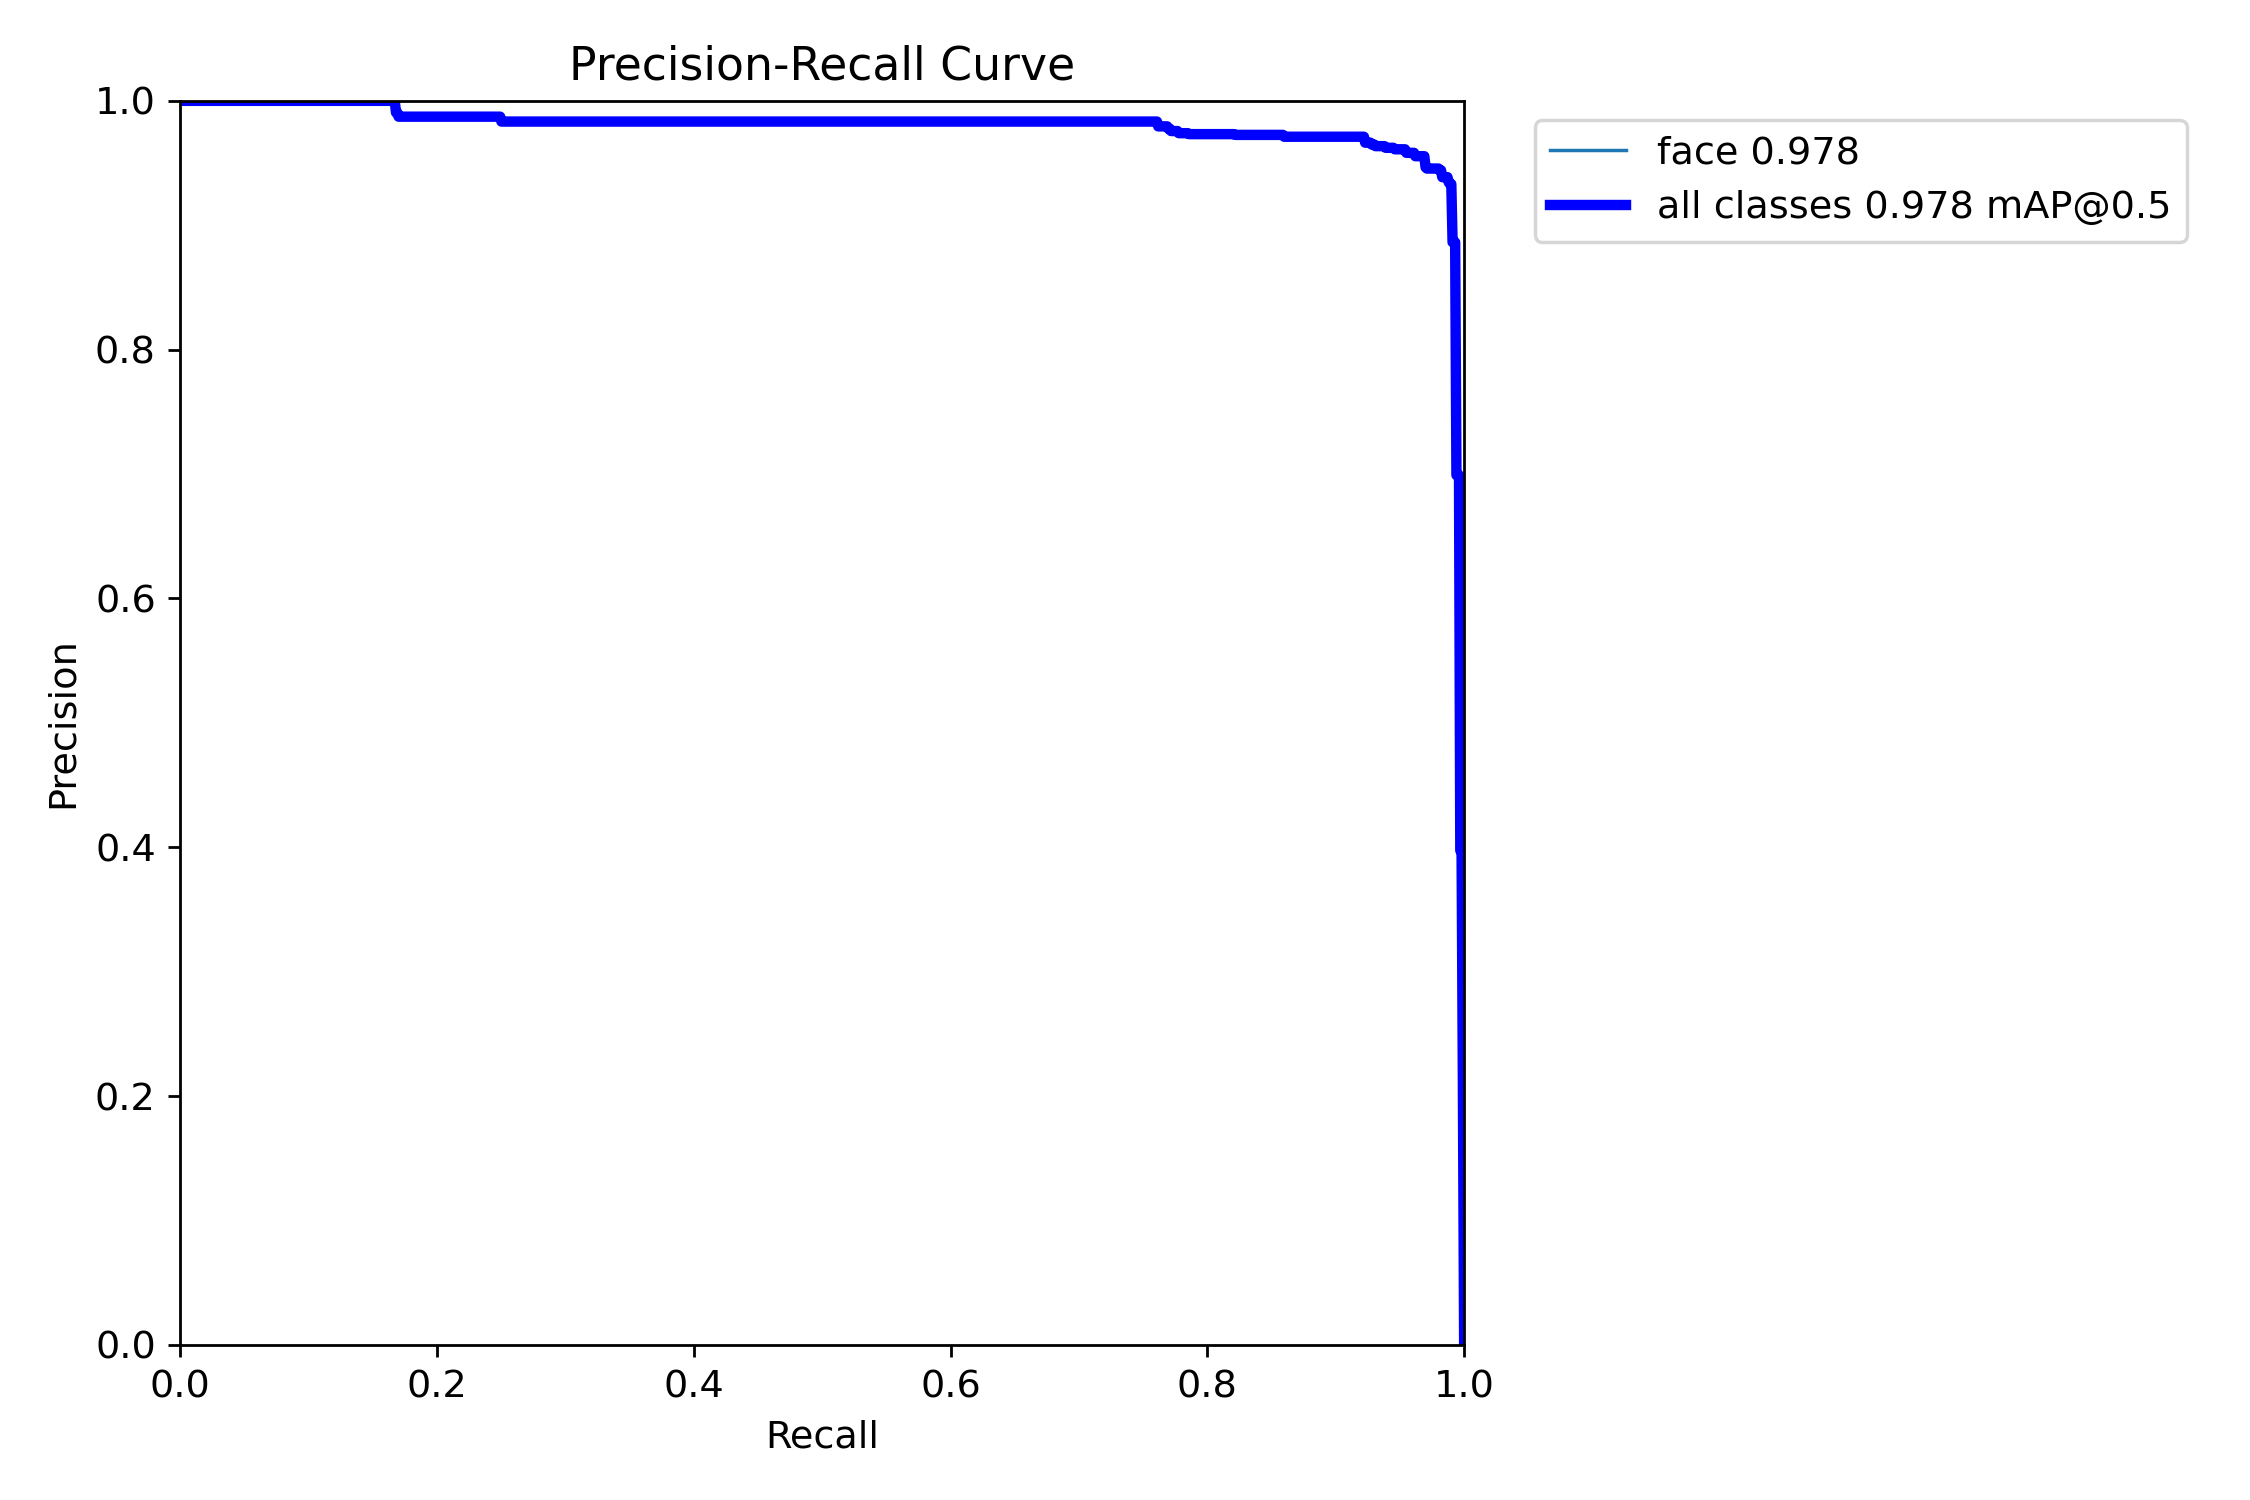

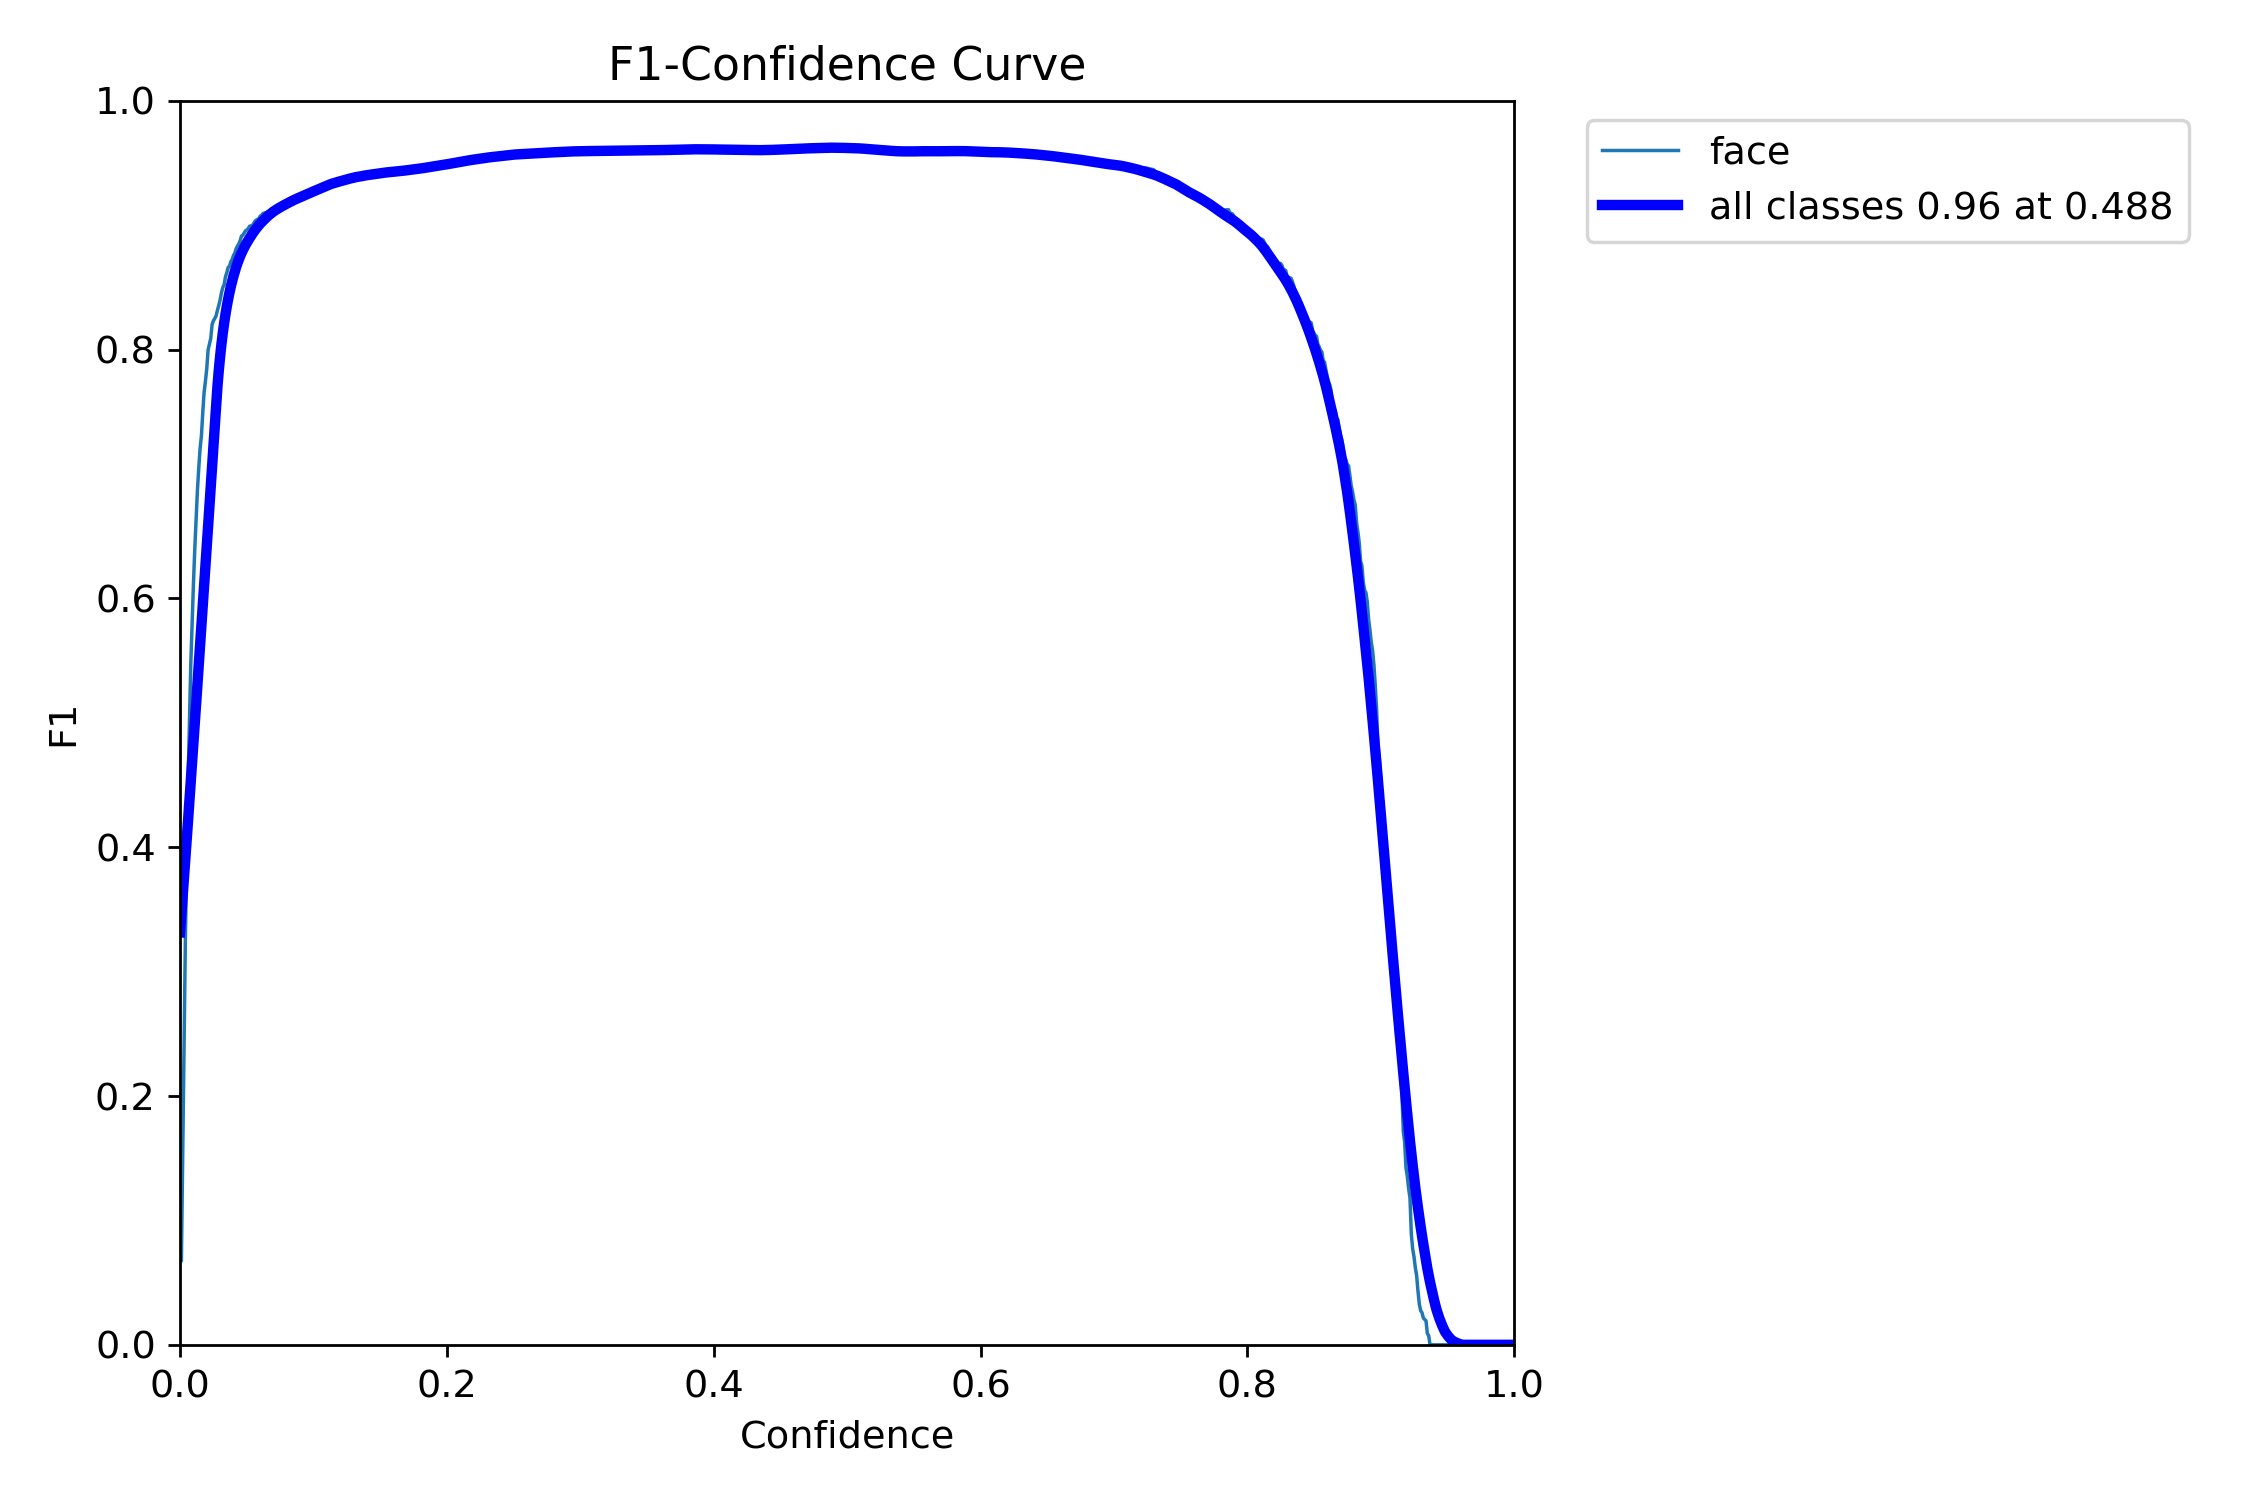

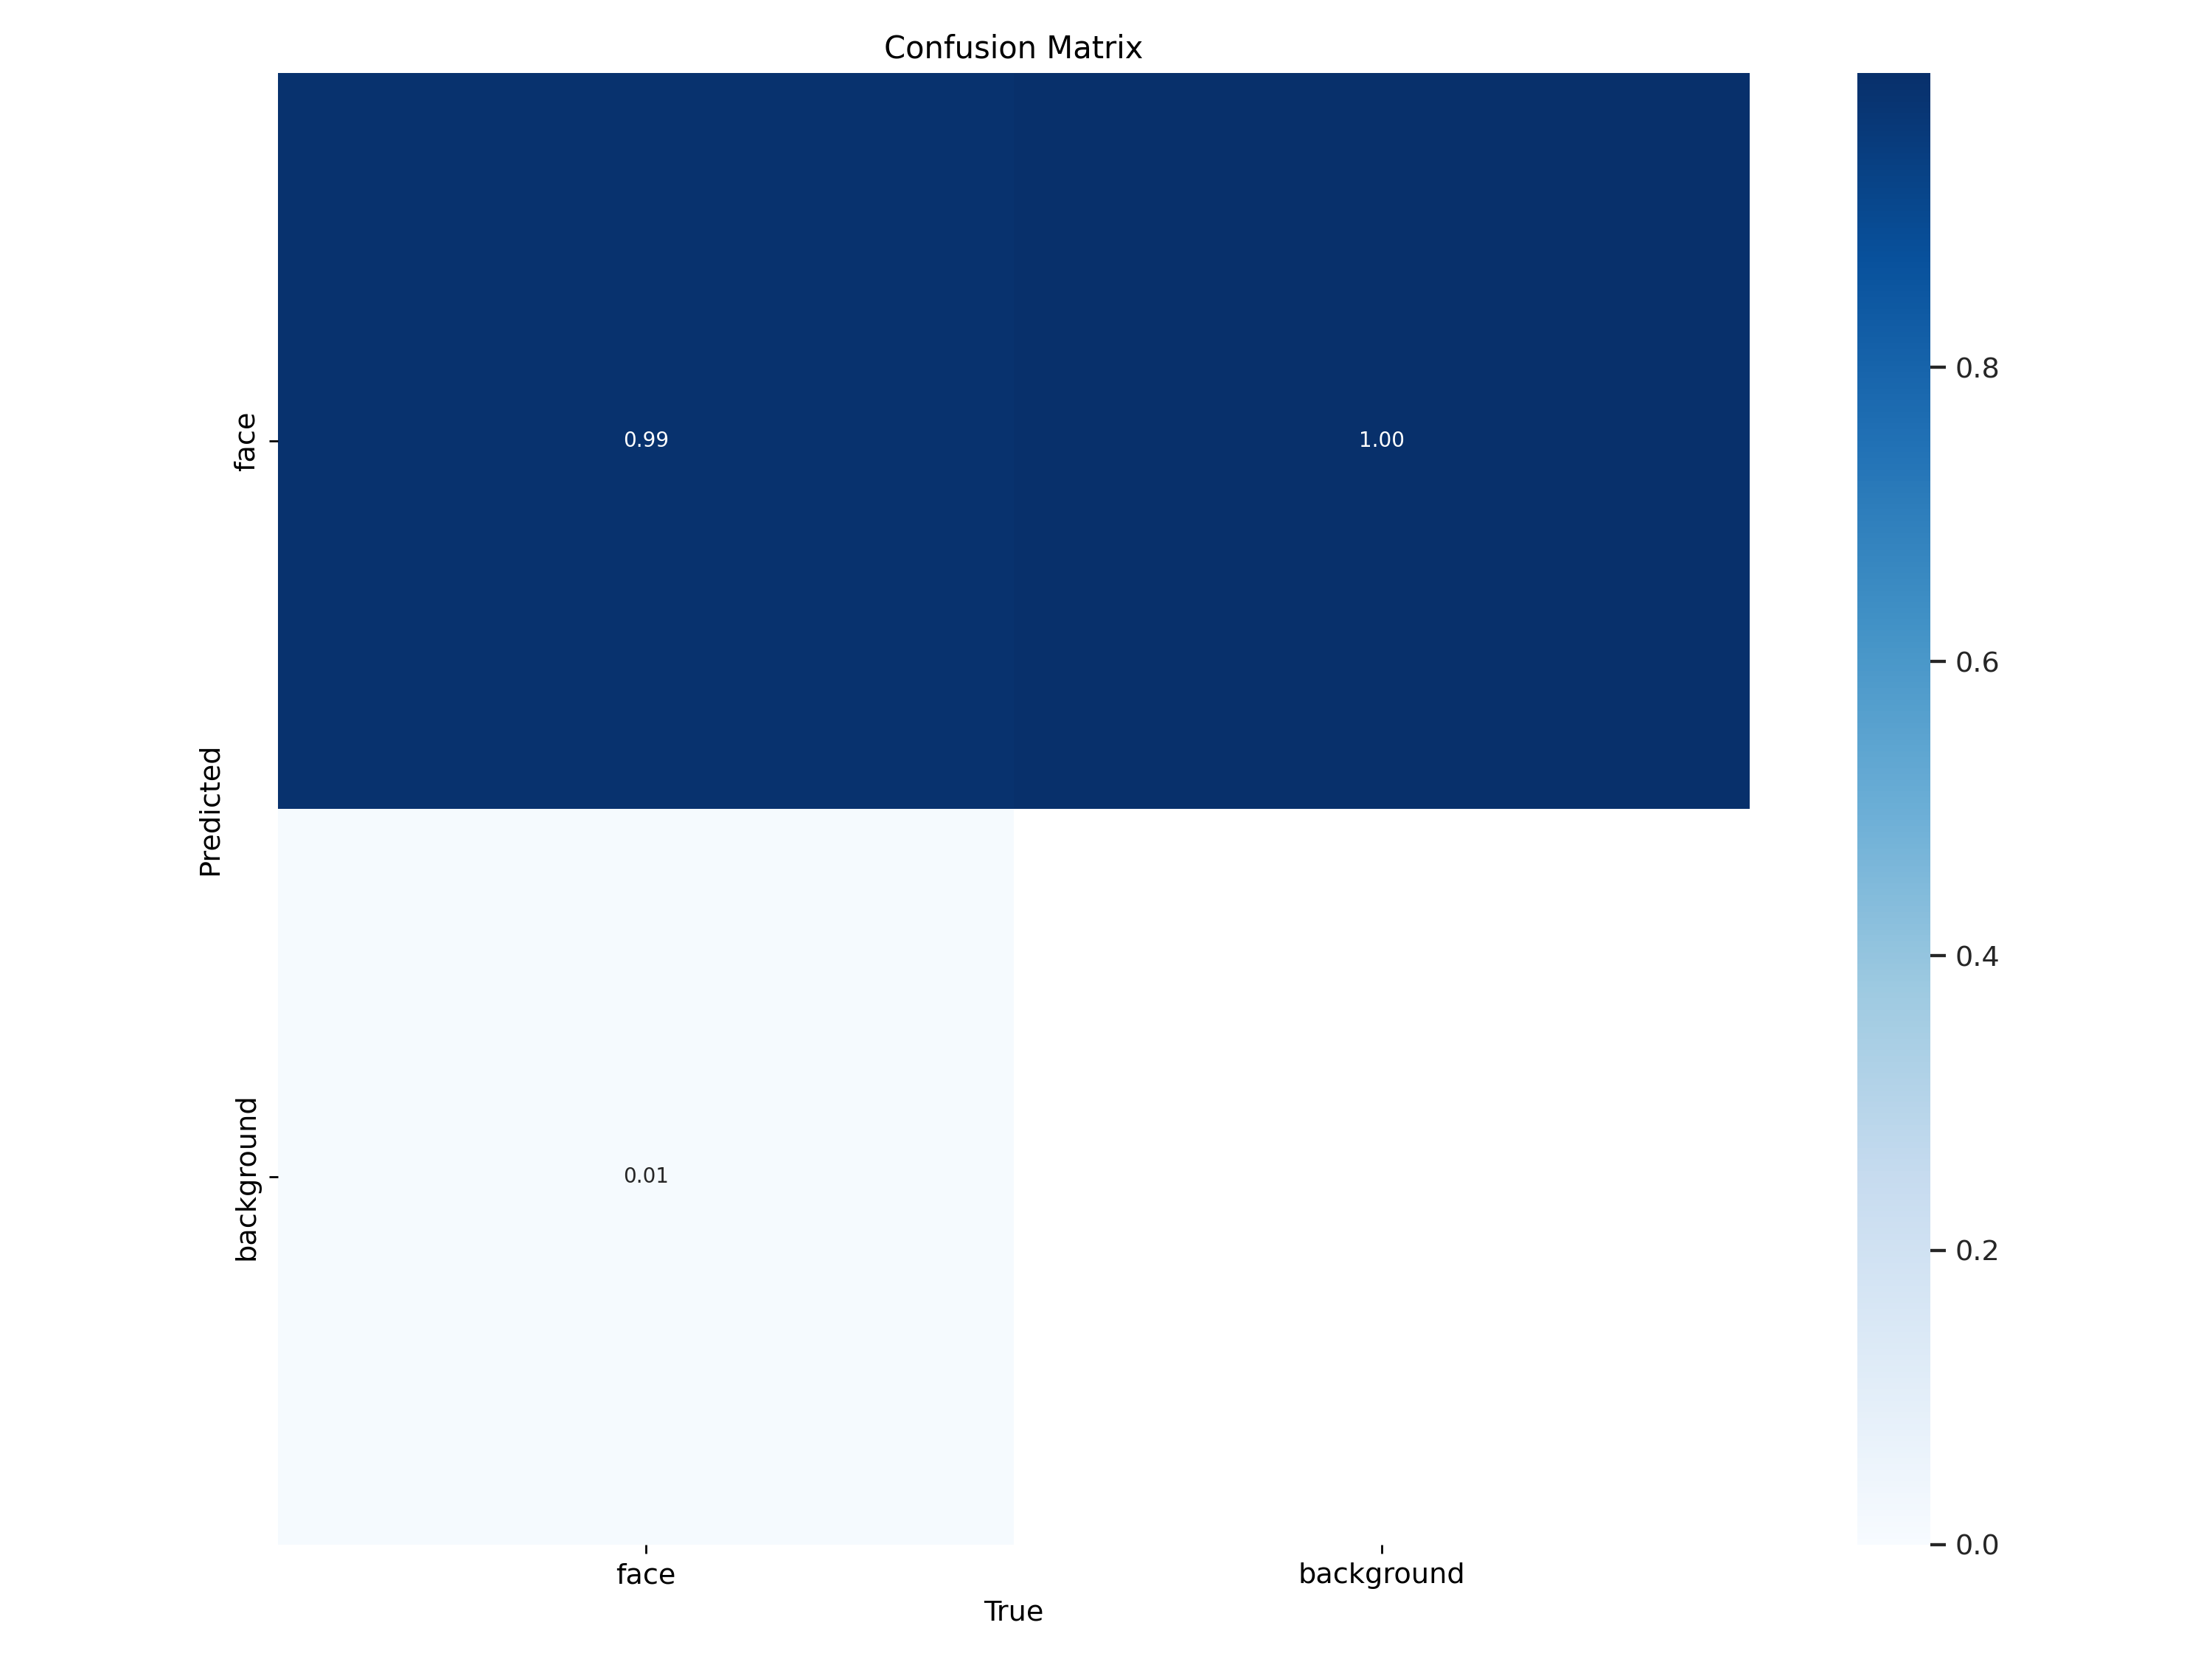

In [ ]:
from IPython.display import Image, display

display(Image(filename="/content/yolo_runs/face_det/results.png"))           # Training curves
display(Image(filename="/content/yolo_runs/face_det/PR_curve.png"))          # Precision/Recall curve
display(Image(filename="/content/yolo_runs/face_det/F1_curve.png"))          # F1 score curve
display(Image(filename="/content/yolo_runs/face_det/confusion_matrix.png"))  # Raw confusion matrix


In [190]:
import pandas as pd

df = pd.read_csv("/content/yolo_runs/face_det/results.csv")
df.tail()  # last epoch summary


epoch        train/box_loss        train/obj_loss  \
10                    10              0.022776              0.006420   
11                    11              0.023052              0.006222   
12                    12              0.021901              0.006358   
13                    13              0.021674              0.005908   
14                    14              0.022021              0.006084   

          train/cls_loss     metrics/precision        metrics/recall  \
10                     0               0.94819               0.97412   
11                     0               0.93798               0.98548   
12                     0               0.93386               0.97919   
13                     0               0.94954               0.97118   
14                     0               0.94375               0.98226   

         metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
10               0.97953               0.79582              0.010531   
11               0.97846               0.76639              0.012673   
12               0.97667               0.79975              0.010459   
13               0.98077               0.79179              0.011005   
14               0.97765               0.80159              0.009974   

            val/obj_loss          val/cls_loss                 x/lr0  \
10              0.002191                     0              0.005200   
11              0.002119                     0              0.004667   
12              0.002081                     0              0.004133   
13              0.002162                     0              0.003600   
14              0.002008                     0              0.003067   

                   x/lr1                 x/lr2  
10              0.005200              0.005200  
11              0.004667              0.004667  
12              0.004133              0.004133  
13              0.003600              0.003600  
14              0.003067              0.003067

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['               epoch'].plot(kind='hist', bins=20, title='               epoch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['      train/box_loss'].plot(kind='hist', bins=20, title='      train/box_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['      train/obj_loss'].plot(kind='hist', bins=20, title='      train/obj_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='               epoch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='               epoch', y='      train/box_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='      train/box_loss', y='      train/obj_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='      train/obj_loss', y='   metrics/precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['      train/box_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('      train/box_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['      train/obj_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('      train/obj_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['   metrics/precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('   metrics/precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['      metrics/recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('      metrics/recall')

from matplotlib import pyplot as plt
_df_28['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['               epoch'].plot(kind='line', figsize=(8, 4), title='               epoch')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['      train/box_loss'].plot(kind='line', figsize=(8, 4), title='      train/box_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['      train/obj_loss'].plot(kind='line', figsize=(8, 4), title='      train/obj_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

In [205]:
import os, glob

TRAIN_DIR = sorted(glob.glob("/content/yolo_runs/face_det*"))[-1]
print("Training Directory:", TRAIN_DIR)
BEST_WEIGHTS = os.path.join(TRAIN_DIR, "weights", "best.pt")
print("Using Weights:", BEST_WEIGHTS)


Training Directory: /content/yolo_runs/face_det
Using Weights: /content/yolo_runs/face_det/weights/best.pt


In [206]:
!python val.py --weights "$BEST_WEIGHTS" --data /content/yolo_data.yaml --img 640 --project /content/yolo_runs --name face_val --exist-ok
VAL_DIR = "/content/yolo_runs/face_val"


val: data=/content/yolo_data.yaml, weights=['/content/yolo_runs/face_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/yolo_runs, name=face_val, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolo_dataset/labels/val.cache... 619 images, 81 backgrounds, 0 corrupt: 100% 700/700 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 22/22 [00:28<00:00,  1.30s/it]
                   all        700        620      0.944      0.982      0.978      0.803
Speed: 0.2ms pre-process, 5.1ms inference, 2.5ms NMS per image at shape (32

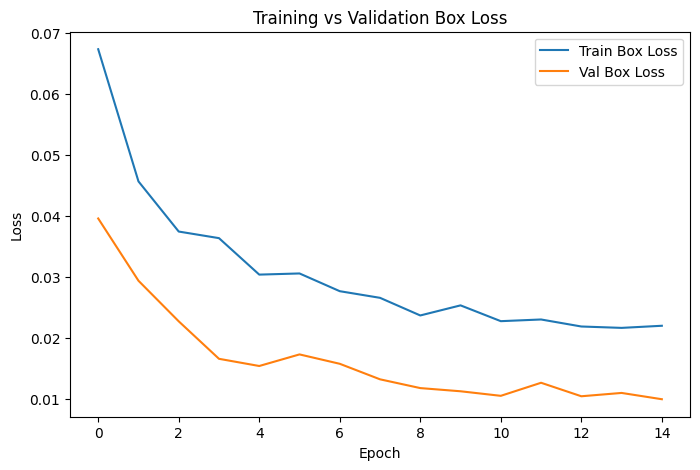

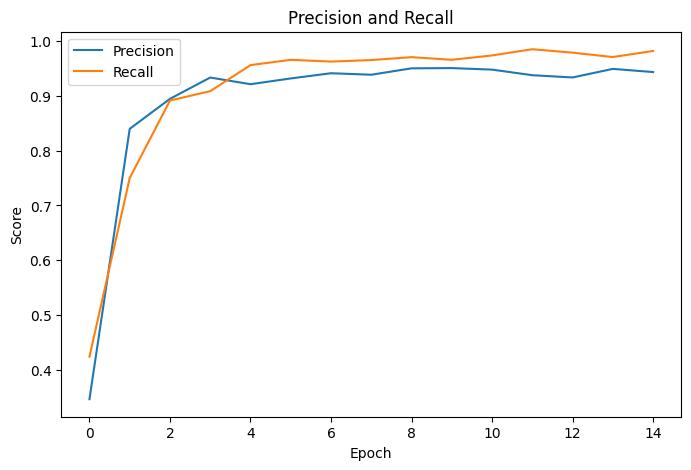

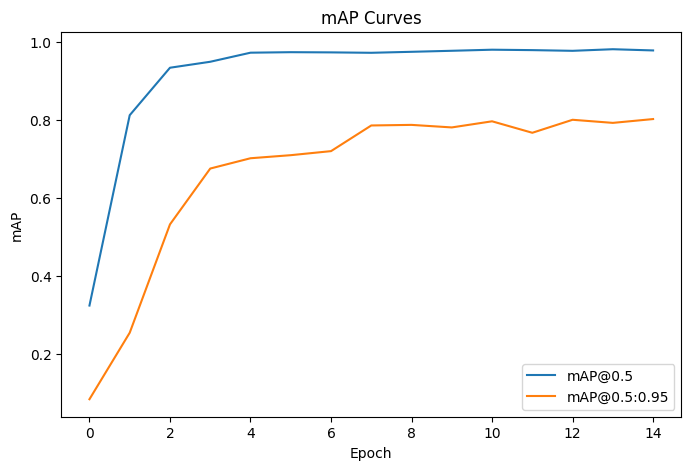

In [211]:
import matplotlib.pyplot as plt

# Identify column names automatically
epo_col = [c for c in df.columns if 'epoch' in c.lower()][0]
prec_col = [c for c in df.columns if 'prec' in c.lower()][0]
rec_col  = [c for c in df.columns if 'recall' in c.lower()][0]
map50_col = [c for c in df.columns if 'mAP_0.5' in c][0]
map95_col = [c for c in df.columns if 'mAP_0.5:0.95' in c][0]
val_box_col = [c for c in df.columns if 'val/box_loss' in c][0]
train_box_col = [c for c in df.columns if 'train/box_loss' in c][0]

# Plot Box Loss
plt.figure(figsize=(8,5))
plt.plot(df[epo_col], df[train_box_col], label="Train Box Loss")
plt.plot(df[epo_col], df[val_box_col], label="Val Box Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Box Loss")
plt.legend()
plt.show()

# Plot Precision & Recall
plt.figure(figsize=(8,5))
plt.plot(df[epo_col], df[prec_col], label="Precision")
plt.plot(df[epo_col], df[rec_col], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision and Recall")
plt.legend()
plt.show()

# Plot mAP curves
plt.figure(figsize=(8,5))
plt.plot(df[epo_col], df[map50_col], label="mAP@0.5")
plt.plot(df[epo_col], df[map95_col], label="mAP@0.5:0.95")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("mAP Curves")
plt.legend()
plt.show()


In [214]:
KNOWN_SRC = "/content/drive/MyDrive/Own Dataset/known_faces/Nina"
KNOWN_SRC = "/content/drive/MyDrive/Own Dataset/known_faces/Tawsif"

!python detect.py --weights "$BEST_WEIGHTS" --source "$KNOWN_SRC" --img 640 --save-txt --save-conf --save-crop --project /content/yolo_runs --name known_detect --exist-ok

KNOWN_DETECT_DIR = "/content/yolo_runs/known_det"


detect: weights=['/content/yolo_runs/face_det/weights/best.pt'], source=/content/drive/MyDrive/Own Dataset/known_faces/Tawsif, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolo_runs, name=known_detect, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/16 /content/drive/MyDrive/Own Dataset/known_faces/Tawsif/face_001.jpg: 640x480 1 face, 34.9ms
image 2/16 /content/drive/MyDrive/Own Dataset/known_faces/Tawsif/face_002.jpg: 640x448 1 face, 34.9ms
image 3/16 /content/drive/MyDrive/Own Dataset/known

In [228]:
UNKNOWN_SRC = "/content/drive/MyDrive/Unknown_Test"
!python detect.py --weights "$BEST_WEIGHTS" --source "$UNKNOWN_SRC" --img 640 --save-txt --save-conf --save-crop --project /content/yolo_runs --name unknown_detect --exist-ok

UNKNOWN_DETECT_DIR = "/content/yolo_runs/unknown_detect"


detect: weights=['/content/yolo_runs/face_det/weights/best.pt'], source=/content/drive/MyDrive/Unknown_Test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolo_runs, name=unknown_detect, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/drive/MyDrive/Unknown_Test/Unknown.jpg: 448x640 1 face, 38.0ms
image 2/2 /content/drive/MyDrive/Unknown_Test/Unknown2.jpg: 640x640 1 face, 11.6ms
Speed: 0.6ms pre-process, 24.8ms inference, 53.0ms NMS per image at shape (1, 3, 640, 640)
Results saved t

# **TESTING OUR MODEL**

Known results folder: /content/yolo_runs/known_detect
Unknown results folder: /content/yolo_runs/unknown_detect

KNOWN FACES DETECTION:


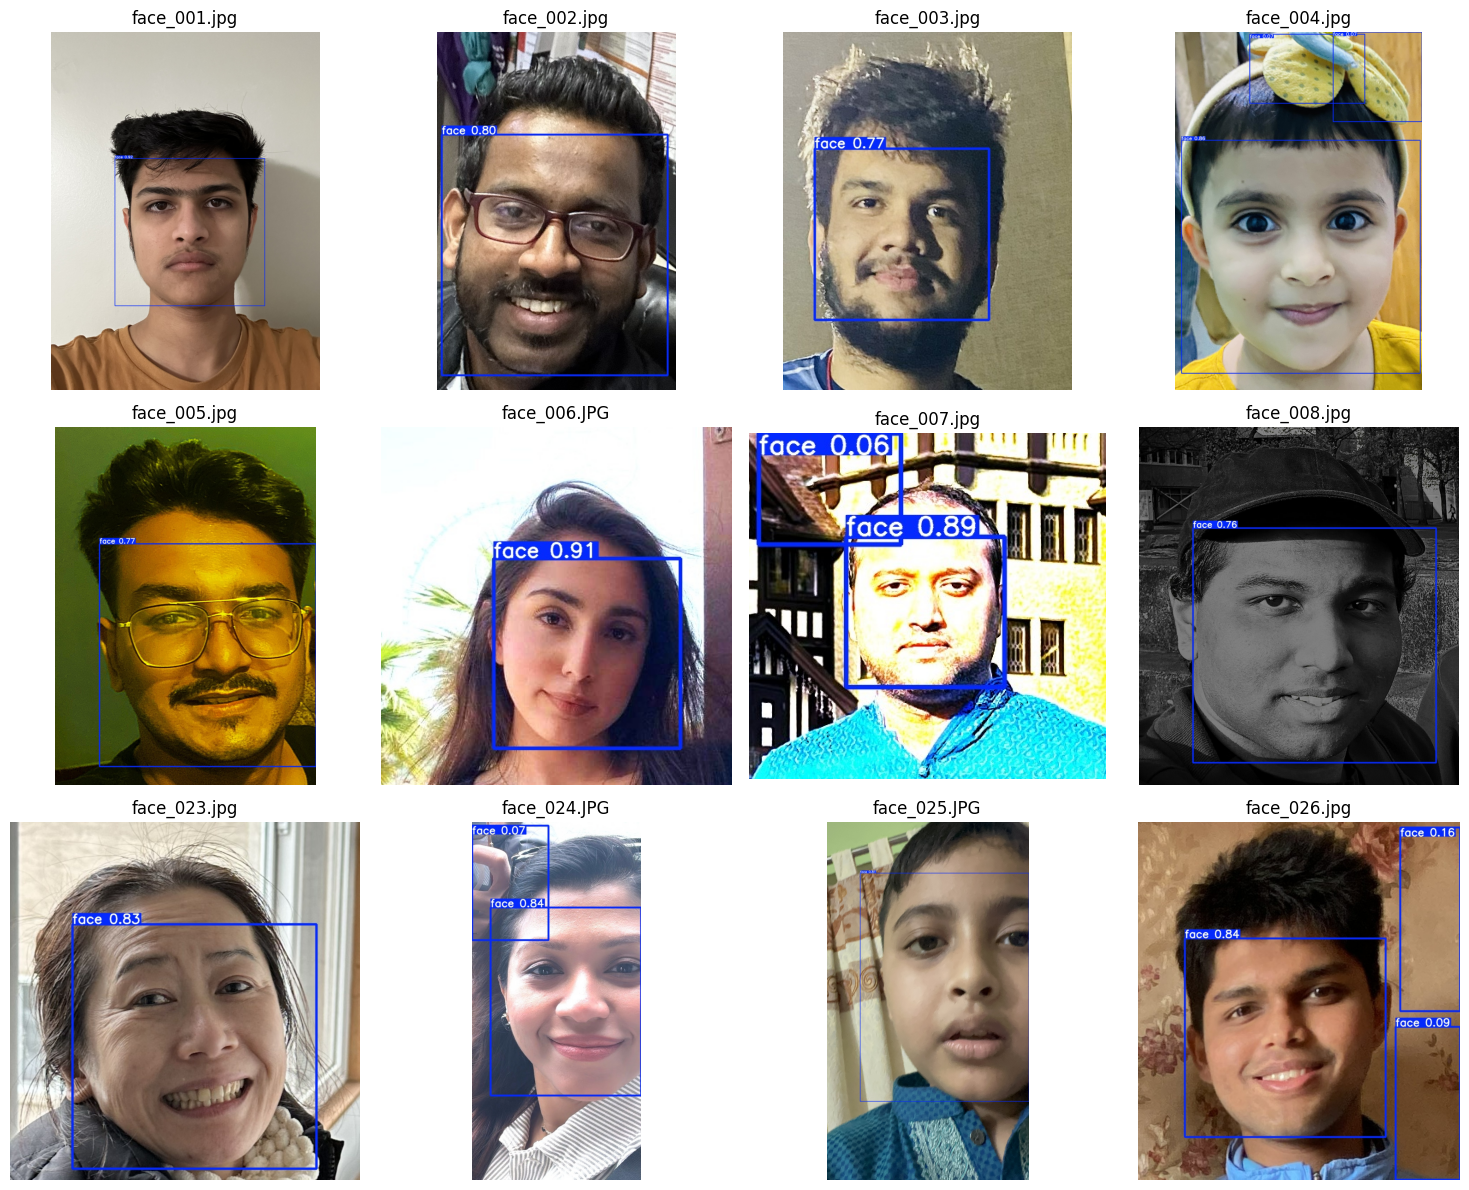


UNKNOWN FACES DETECTION:


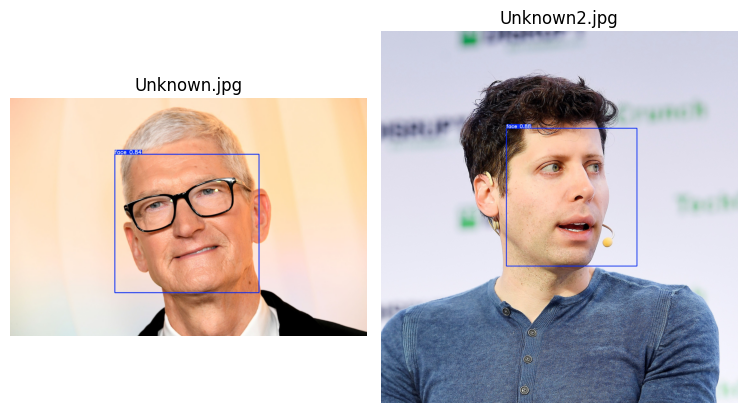

In [269]:
import glob, os, cv2
import matplotlib.pyplot as plt

# Automatically find the most recent detection folders
KNOWN_DETECT_DIR = sorted(glob.glob("/content/yolo_runs/known_detect"))[-1]
UNKNOWN_DETECT_DIR = sorted(glob.glob("/content/yolo_runs/unknown_detect"))[-1]

print("Known results folder:", KNOWN_DETECT_DIR)
print("Unknown results folder:", UNKNOWN_DETECT_DIR)

def show_results(folder):
    images = sorted([os.path.join(folder, f)
                     for f in os.listdir(folder)
                     if f.lower().endswith(('.jpg','.jpeg','.png'))])

    if len(images) == 0:
        print("No images found in:", folder)
        return

    plt.figure(figsize=(15, 12))
    for i, img_path in enumerate(images[:12]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 4, i+1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\nKNOWN FACES DETECTION:")
show_results(KNOWN_DETECT_DIR)

print("\nUNKNOWN FACES DETECTION:")
show_results(UNKNOWN_DETECT_DIR)


In [293]:
import os, glob

# Latest training dir + best weights
TRAIN_DIR = sorted(glob.glob("/content/yolo_runs/face_det*"))[-1]
BEST_WEIGHTS = os.path.join(TRAIN_DIR, "weights", "best.pt")
print("Using weights:", BEST_WEIGHTS)

# Re-validate
!python val.py --weights "$BEST_WEIGHTS" --data /content/yolo_data.yaml --img 640 --project /content/yolo_runs --name face_val --exist-ok

# Correct YOLO detection sources
KNOWN_SRC = "/content/drive/MyDrive/Own Dataset/known_faces/*/*"
UNKNOWN_SRC = "/content/drive/MyDrive/Unknown_Test"

# Re-run detection with lower conf
!python detect.py --weights "$BEST_WEIGHTS" --source "$KNOWN_SRC" --img 640 --conf 0.05 --save-txt --save-conf --save-crop --project /content/yolo_runs --name known_detect --exist-ok
!python detect.py --weights "$BEST_WEIGHTS" --source "$UNKNOWN_SRC" --img 640 --conf 0.05 --save-txt --save-conf --save-crop --project /content/yolo_runs --name unknown_detect --exist-ok

# Assign correct crop output folders
KNOWN_DETECT_DIR = "/content/yolo_runs/known_detect/crops/face"
UNKNOWN_DETECT_DIR = "/content/yolo_runs/unknown_detect/crops/face"

# Count face crops
print("Known crops:", len(glob.glob(KNOWN_DETECT_DIR + "/*.jpg")))
print("Unknown crops:", len(glob.glob(UNKNOWN_DETECT_DIR + "/*.jpg")))


Using weights: /content/yolo_runs/face_det/weights/best.pt
val: data=/content/yolo_data.yaml, weights=['/content/yolo_runs/face_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/yolo_runs, name=face_val, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolo_dataset/labels/val.cache... 619 images, 81 backgrounds, 0 corrupt: 100% 700/700 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 22/22 [00:27<00:00,  1.24s/it]
                   all        700        620      0.944      0.982      0.978      0.803
Speed: 0.8ms pre

In [294]:
from deepface import DeepFace
import numpy as np
import os

KNOWN_ROOT = "/content/drive/MyDrive/Own Dataset/known_faces"
embedding_db = {}

for person in sorted(os.listdir(KNOWN_ROOT)):
    pdir = os.path.join(KNOWN_ROOT, person)
    if not os.path.isdir(pdir):
        continue

    vecs = []
    for img_file in sorted(os.listdir(pdir)):
        if img_file.lower().endswith(('.jpg','.jpeg','.png')):
            path = os.path.join(pdir, img_file)
            rep = DeepFace.represent(img_path=path, model_name="Facenet", enforce_detection=False)[0]['embedding']
            vecs.append(np.array(rep, dtype=np.float32))

    embedding_db[person] = np.mean(vecs, axis=0)

print("Identities loaded:", list(embedding_db.keys()))


Identities loaded: ['Nina', 'Tawsif']


In [310]:
import cv2

def preprocess_crop(crop_bgr):
    crop = cv2.resize(crop_bgr, (160, 160))
    ycrcb = cv2.cvtColor(crop, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y = cv2.equalizeHist(y)
    crop = cv2.merge([y, cr, cb])
    crop = cv2.cvtColor(crop, cv2.COLOR_YCrCb2BGR)
    return crop

def cosine_sim(a, b):
    a = a / (np.linalg.norm(a) + 1e-9)
    b = b / (np.linalg.norm(b) + 1e-9)
    return float(np.dot(a, b))

def identify(face_vec, db, threshold=0.30):
    face_vec = face_vec / (np.linalg.norm(face_vec) + 1e-9)
    best_name, best_score = "UNKNOWN", 0.0
    for name, ref_vec in db.items():
        ref_vec = ref_vec / (np.linalg.norm(ref_vec) + 1e-9)
        score = float(np.dot(face_vec, ref_vec))
        if score > best_score:
            best_name, best_score = name, score
    return (best_name if best_score >= threshold else "UNKNOWN"), best_score



In [311]:
from deepface import DeepFace
import glob, pathlib

OUTPUT_DIR = "/content/doorlock_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def run_recognition(CROP_DIR):
    for crop_path in glob.glob(CROP_DIR + "/*.jpg"):
        crop = cv2.imread(crop_path)
        crop_p = preprocess_crop(crop)

        rep = DeepFace.represent(img_path=crop_p, model_name="Facenet", detector_backend="skip")[0]['embedding']
        vec = np.array(rep, dtype=np.float32)

        name, score = identify(vec, embedding_db, threshold=0.75)
        color = (0,0,255) if name != "UNKNOWN" else (0,255,0)

        vis = crop.copy()
        cv2.rectangle(vis, (0,0), (vis.shape[1], vis.shape[0]), color, 2)
        cv2.putText(vis, f"{name} {score:.2f}", (5,25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        out_path = os.path.join(OUTPUT_DIR, pathlib.Path(crop_path).name)
        cv2.imwrite(out_path, vis)

run_recognition("/content/yolo_runs/known_detect/crops/face")
run_recognition("/content/yolo_runs/unknown_detect/crops/face")


In [297]:
import cv2, glob, numpy as np
from deepface import DeepFace

test_face = glob.glob("/content/yolo_runs/known_detect/crops/face/*.jpg")[0]  # take one of YOUR crops
img = cv2.imread(test_face)

rep = DeepFace.represent(img_path=img, model_name="Facenet", detector_backend="skip")[0]['embedding']
vec = np.array(rep, dtype=np.float32) / (np.linalg.norm(rep) + 1e-9)

print("\nSimilarity Scores vs DB:\n")
for name, ref in embedding_db.items():
    ref_norm = ref / (np.linalg.norm(ref) + 1e-9)
    score = float(np.dot(vec, ref_norm))
    print(f"{name}: {score:.4f}")



Similarity Scores vs DB:

Nina: 0.4082
Tawsif: 0.3617



FINAL DOORLOCK RESULTS (Known = Red, Unknown = Green):


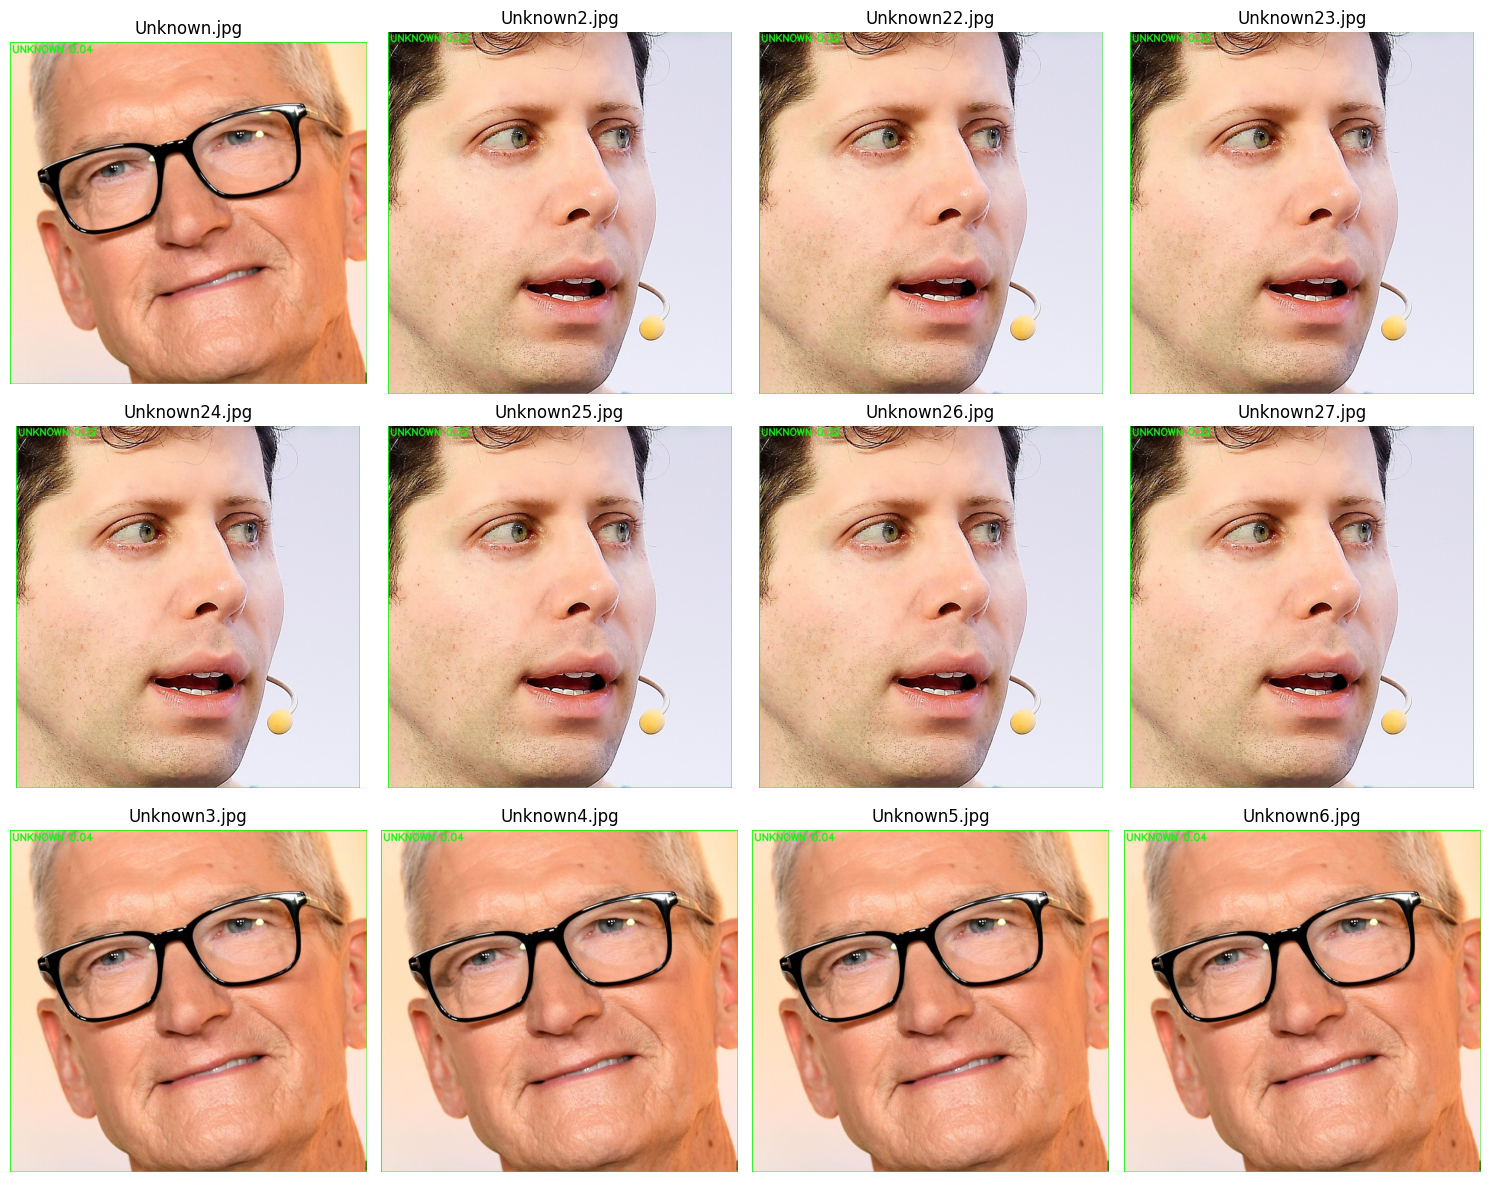

In [315]:
import matplotlib.pyplot as plt

def show_results(folder):
    images = sorted([os.path.join(folder,f) for f in os.listdir(folder) if f.lower().endswith(('.jpg','.png','.jpeg'))])
    plt.figure(figsize=(15,12))
    for i, img_path in enumerate(images[:12]):
        img = cv2.imread(img_path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3,4,i+1); plt.imshow(img); plt.title(os.path.basename(img_path)); plt.axis('off')
    plt.tight_layout(); plt.show()

print("\nFINAL DOORLOCK RESULTS (Known = Red, Unknown = Green):")
show_results("/content/doorlock_results")


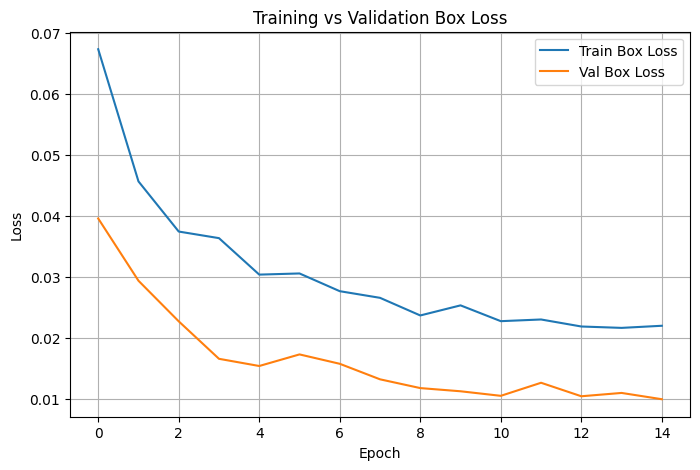

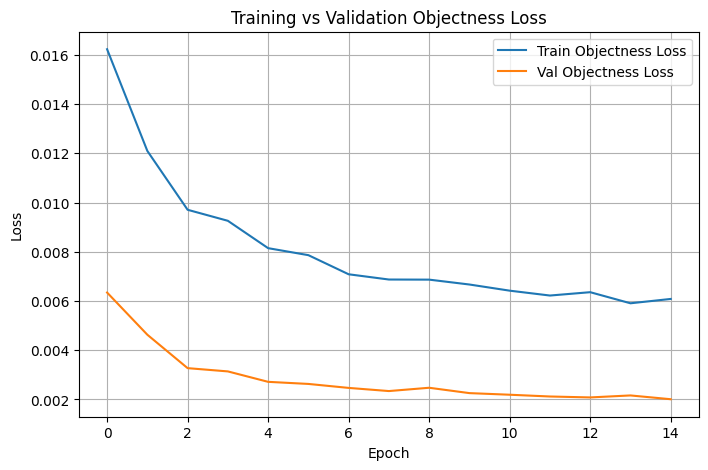

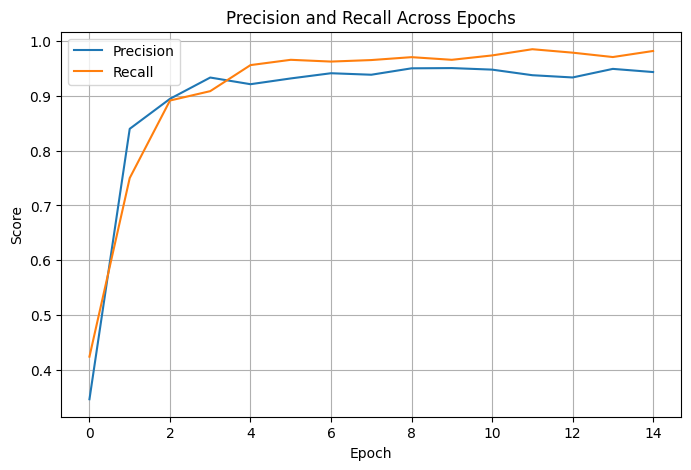

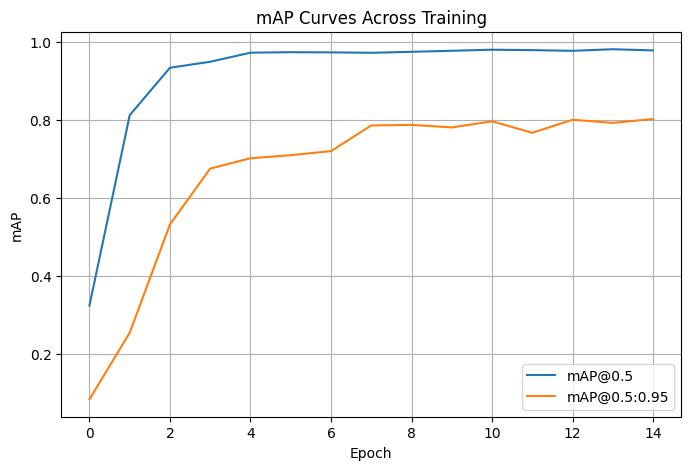

In [319]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean column names
df = pd.read_csv("/content/yolo_runs/face_det/results.csv")
df.columns = df.columns.str.strip()   # remove leading spaces

# Extract cleaned names for convenience
epoch = df["epoch"]

# ------------------ Training vs Validation Box Loss ------------------
plt.figure(figsize=(8,5))
plt.plot(epoch, df["train/box_loss"], label="Train Box Loss")
plt.plot(epoch, df["val/box_loss"], label="Val Box Loss")
plt.title("Training vs Validation Box Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True)
plt.show()

# ------------------ Objectness Loss ------------------
plt.figure(figsize=(8,5))
plt.plot(epoch, df["train/obj_loss"], label="Train Objectness Loss")
plt.plot(epoch, df["val/obj_loss"], label="Val Objectness Loss")
plt.title("Training vs Validation Objectness Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True)
plt.show()

# ------------------ Precision & Recall ------------------
plt.figure(figsize=(8,5))
plt.plot(epoch, df["metrics/precision"], label="Precision")
plt.plot(epoch, df["metrics/recall"], label="Recall")
plt.title("Precision and Recall Across Epochs")
plt.xlabel("Epoch"); plt.ylabel("Score")
plt.legend(); plt.grid(True)
plt.show()

# ------------------ mAP Curves ------------------
plt.figure(figsize=(8,5))
plt.plot(epoch, df["metrics/mAP_0.5"], label="mAP@0.5")
plt.plot(epoch, df["metrics/mAP_0.5:0.95"], label="mAP@0.5:0.95")
plt.title("mAP Curves Across Training")
plt.xlabel("Epoch"); plt.ylabel("mAP")
plt.legend(); plt.grid(True)
plt.show()


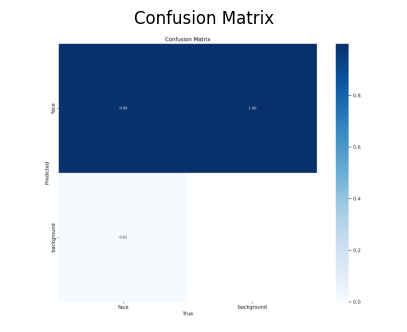

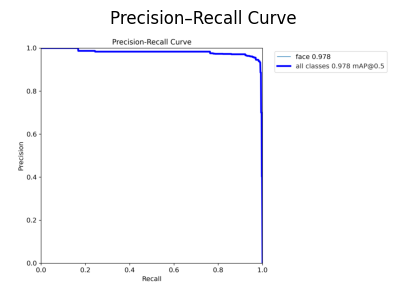

In [326]:
import cv2
import matplotlib.pyplot as plt
import os

VAL_DIR = "/content/yolo_runs/face_val"

def safe_show(img_path, title):
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(5,4))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"⚠️ Not found: {img_path}")

safe_show(f"{VAL_DIR}/confusion_matrix.png", "Confusion Matrix")
safe_show(f"{VAL_DIR}/PR_curve.png", "Precision–Recall Curve")


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [258]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 32.7ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 34.1ms
Speed: 0.4ms pre-process, 33.4ms inference, 34.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://github.com/ultralytics/assets/releases/download/v0.0.0/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:12<00:00, 66.6MB/s]


In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2024.59it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:25<00:00,  1.84it/s]
                   all       5000      36335      0.671      0.519      0.566      0.371
Speed: 0.1ms pre-process, 3.1ms inference, 2.3ms NMS per image at shape (32,

# 3. Train

<p align=""><a href="https://ultralytics.com/hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/datasets/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

2023-04-09 14:11:38.063605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 14:11:39.026661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_inter

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://docs.ultralytics.com/yolov5/tutorials/comet_logging_integration). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://docs.ultralytics.com/yolov5/tutorials/clearml_logging_integration) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices.

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/models/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/google_cloud_quickstart_tutorial/)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/aws_quickstart_tutorial/)
- **Docker Image**. See [Docker Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/docker_image_quickstart_tutorial/) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.